# Convolution

* In context of CNN, filters are referred to as convolution kernels.
* The process of passing the filters over an image is known as convolution.

# Convolutional Layers

* There are issues with ANNs when using them for image processing, such as large amount of     parameters, and losing out 2D info by flattening out the image, and only being able to       work with similar images.

* A CNN helps alleviate these issues.

* A convolutional layer is created when we apply multiple image filters to the input images.

* The layer is then trained to figure out the best filter weight values.

* It helps to reduce parameters by focusing on local connectivity.

    * Neurons are only connected to a subset of local neurons in the next layer.
    
    * These become the filter themselves.
    
# Pooling Layers

* Used to reduce number of parameters.

* They take in CNNs.

* CNNs can have all types of architectures,
    
    * Input -> CNN -> CNN -> Pooling
    * Input -> CNN -> Pooling -> CNN
    
**When working with images, always standardize the data.**

**An array of image data is of 4 dimensions, (samples, x, y, channels).**

# CNN on MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Data Preprocessing

In [3]:
from tensorflow.keras.utils import to_categorical

# Perform one-hot encoding
y_cat_train = to_categorical(y_train)
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [4]:
y_cat_test = to_categorical(y_test)

In [5]:
# Scale images by dividing them by 255

X_train = X_train / 255
X_test = X_test / 255

In [6]:
# Batch size, width, height, color channels

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Building a model

* Things you need to tweak based on data:

    * input_shape
    * presence of flatten() layer
    * output layer parameters  

    
* Things you can experiment with:
    
    * adding convolutional and pooling layers
    * filters, kernel_size, activation
    
**Try to have at max 2 dense layers after flattening, not more.**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(
    filters=32, # Any power of 2, increase with increasing complexity in photos
    kernel_size=(4, 4), # Decide based on pixel dimensions
    input_shape=(28, 28, 1),
    activation='relu',
))
model.add(MaxPool2D(2, 2)) # (2,2) is default

model.add(Flatten()) # Converts 28x28 into 1D array of 784, as dense layer needs 1D data

model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1) # Could be val_accuracy too

In [13]:
model.fit(
    X_train, 
    y_cat_train, 
    epochs=10, 
    validation_data=(X_test, y_cat_test),
    callbacks=[early_stop]
)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1411 - accuracy: 0.9583 - val_loss: 0.0586 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0380 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0386 - val_accuracy: 0.9875


# Evaluating the Model

In [15]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.141119,0.958333,0.058618,0.9809
1,0.047140,0.985550,0.037974,0.9865
2,0.031209,0.990150,0.038622,0.9875


<AxesSubplot:>

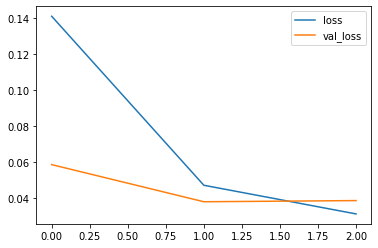

In [16]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

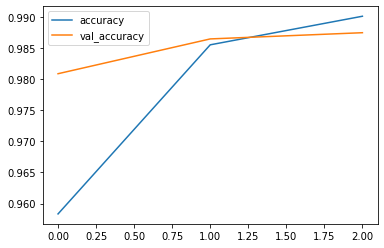

In [17]:
metrics[['accuracy', 'val_accuracy']].plot()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
predictions = model.predict_classes(X_test)

# predictions = (model.predict(X_test) > 0.5).astype("int32") 
# When using the latter, check dim of predictions and pass y values accordingly

/usr/local/anaconda3/envs/neural-engine/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.97      0.98       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
confusion_matrix(y_test, predictions)

array([[ 974,    0,    1,    1,    0,    1,    2,    0,    1,    0],
       [   0, 1131,    0,    0,    0,    1,    2,    0,    1,    0],
       [   1,    1, 1019,    1,    0,    0,    3,    4,    3,    0],
       [   0,    0,    0, 1008,    0,    1,    0,    0,    1,    0],
       [   1,    2,    0,    0,  952,    0,    8,    2,    2,   15],
       [   1,    0,    0,    5,    0,  882,    3,    0,    1,    0],
       [   5,    2,    0,    0,    1,    2,  947,    0,    1,    0],
       [   0,    2,    5,    5,    0,    1,    0, 1013,    1,    1],
       [   4,    1,    2,    2,    0,    0,    0,    3,  957,    5],
       [   1,    1,    0,    2,    1,    4,    1,    4,    3,  992]])

# Making model predict values

* When passing a new image to the model, reshape it to (num_of_images, width, height, channels)

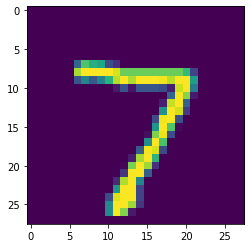

In [49]:
new_num = X_test[0]
plt.imshow(new_num)

In [51]:

model.predict_classes(new_num.reshape(1, 28, 28, 1))

array([7])